## This is a sketch for Adversarial images in MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


In [2]:
import seaborn as sns
sns.set_style('white')
colors_list = sns.color_palette("Paired", 10)

### recreate the network structure

In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_pred = tf.nn.softmax(y_conv)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

### Load previous model

In [4]:
model_path = './MNIST.ckpt'
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
tf.train.Saver().restore(sess, model_path)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Extract some "2" images from test set

In [6]:
index_mask = np.where(mnist.test.labels[:, 2])[0]

In [7]:
subset_mask = np.random.choice(index_mask, 10)

In [8]:
subset_mask

array([9010,   43, 1341, 3811, 6480, 7789, 8262, 1341, 8915, 6064])

In [9]:
origin_images = mnist.test.images[subset_mask]
origin_labels = mnist.test.labels[subset_mask]

In [10]:
origin_labels

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
prediction=tf.argmax(y_pred,1)
prediction_val = prediction.eval(feed_dict={x: origin_images, keep_prob: 1.0}, session=sess)
print("predictions", prediction_val)
probabilities=y_pred
probabilities_val = probabilities.eval(feed_dict={x: origin_images, keep_prob: 1.0}, session=sess)
print ("probabilities", probabilities_val)

predictions [2 2 2 2 2 2 2 2 2 2]
probabilities [[  1.68790103e-11   1.04460350e-10   9.99990940e-01   4.87415809e-06
    6.91035228e-14   4.10699903e-13   1.38419029e-12   7.07499055e-08
    4.17573347e-06   2.63317731e-12]
 [  1.50550719e-07   7.52393389e-03   9.87179160e-01   3.15451246e-07
    5.28161833e-03   3.42207557e-07   1.41383189e-05   2.95582026e-07
    7.38369650e-08   3.04421571e-10]
 [  4.02434095e-14   5.18871945e-10   1.00000000e+00   7.36044212e-12
    3.96116959e-11   9.11448532e-16   2.68945306e-15   7.65700697e-12
    7.59310573e-15   7.34182578e-15]
 [  1.25397404e-03   7.70974736e-07   9.96126950e-01   2.49213097e-03
    6.36435834e-06   2.00931572e-05   1.77277016e-07   7.27009028e-05
    1.58615767e-05   1.11465779e-05]
 [  4.99005437e-05   1.13155475e-05   9.99935031e-01   2.62967137e-09
    1.03853085e-06   4.65414568e-10   3.99612041e-08   2.78365087e-06
    3.01886480e-08   3.22925263e-11]
 [  5.71090376e-13   3.97125555e-10   1.00000000e+00   1.17869670e-

correct label: 2
predict label: 2
Confidence: 0.999991


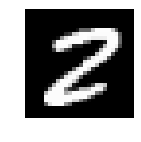

correct label: 2
predict label: 2
Confidence: 0.987179


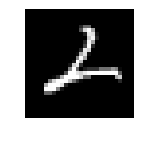

correct label: 2
predict label: 2
Confidence: 1.0


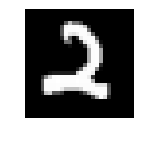

correct label: 2
predict label: 2
Confidence: 0.996127


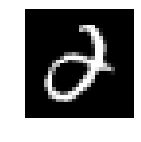

correct label: 2
predict label: 2
Confidence: 0.999935


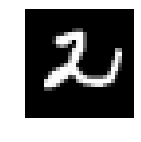

correct label: 2
predict label: 2
Confidence: 1.0


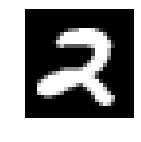

correct label: 2
predict label: 2
Confidence: 0.999972


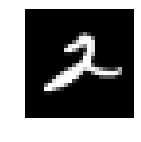

correct label: 2
predict label: 2
Confidence: 1.0


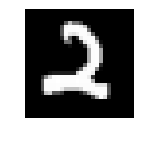

correct label: 2
predict label: 2
Confidence: 1.0


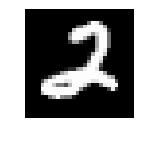

correct label: 2
predict label: 2
Confidence: 1.0


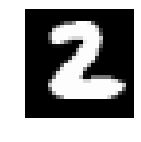

In [12]:
for i in range(0, 10):
    print('correct label:', np.argmax(origin_labels[i]))
    print('predict label:', prediction_val[i])
    print('Confidence:', np.max(probabilities_val[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(origin_images[i].reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
    plt.show()

In [13]:
target_number = 6

In [14]:
target_labels = np.zeros(origin_labels.shape)

In [15]:
target_labels[:, target_number] = 1

In [16]:
origin_labels

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [17]:
target_labels

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [18]:
img_gradient = tf.gradients(cross_entropy, x)[0]

### one Adversarial vs one image

In [19]:
eta = 0.5
iter_num = 10

### Method 1: update using the info in gradient
This means we will update the image based on the value of gradient, ideally, this will give us a adversarial image with less wiggle, as we only need to add a little wiggle when the gradient at that point is large.

In [20]:
adversarial_img = origin_images.copy()
for i in range(0, iter_num):
    gradient = img_gradient.eval({x: adversarial_img, y_: target_labels, keep_prob: 1.0})
    adversarial_img = adversarial_img - eta * gradient
    prediction=tf.argmax(y_pred,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
    probabilities=y_pred
    probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print('Confidence 2:', probabilities_val[:, 2])
    print('Confidence 6:', probabilities_val[:, 6])
    print('-----------------------------------')

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [ 0.99839801  0.50398463  0.99999976  0.94279677  0.99306434  0.99999869
  0.99774051  0.99999976  0.99999988  0.99998116]
Confidence 6: [  6.17733331e-09   3.38034965e-02   3.61205510e-11   5.49222386e-05
   1.65044228e-04   2.51908945e-11   4.98797135e-07   3.61205510e-11
   8.44649004e-11   1.06398193e-06]
-----------------------------------
predictions [2 6 2 2 6 2 2 2 2 2]
Confidence 2: [ 0.90054828  0.03599812  0.99992478  0.47941697  0.3857542   0.99992812
  0.88223279  0.99992478  0.99999475  0.99883395]
Confidence 6: [  5.24239840e-06   9.09998178e-01   3.14857857e-07   1.03679458e-02
   4.14035559e-01   2.03342374e-08   7.65050703e-04   3.14857573e-07
   9.70845377e-08   6.13783835e-04]
-----------------------------------
predictions [3 6 2 6 6 2 2 2 2 2]
Confidence 2: [ 0.20391738  0.02125967  0.99488431  0.12929185  0.01710233  0.99819332
  0.36685336  0.99488431  0.99973804  0.86787164]
Confidence 6: [  5.72559598e-04   9.471

### Method 2: update using the sign of gradient
perform some step size for each pixel 

In [21]:
eta = 0.02
iter_num = 10

In [22]:
adversarial_img = origin_images.copy()
for i in range(0, iter_num):
    gradient = img_gradient.eval({x: adversarial_img, y_: target_labels, keep_prob: 1.0})
    adversarial_img = adversarial_img - eta * np.sign(gradient)
    prediction=tf.argmax(y_pred,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
    probabilities=y_pred
    probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print('Confidence 2:', probabilities_val[:, 2])
    print('Confidence 6:', probabilities_val[:, 6])
    print('-----------------------------------')

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [ 0.99979955  0.86275303  1.          0.9779107   0.99902475  0.99999976
  0.99971646  1.          1.          0.99999583]
Confidence 6: [  1.66726910e-10   1.24624989e-03   4.56519967e-13   8.34497041e-06
   5.59669525e-06   1.79199841e-12   1.30735716e-08   4.56519967e-13
   3.46567068e-12   6.27776799e-08]
-----------------------------------
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [ 0.99511552  0.40977556  0.99999964  0.85962117  0.98393112  0.99999559
  0.99609464  0.99999964  0.99999964  0.99994993]
Confidence 6: [  2.01981152e-08   8.79419371e-02   1.22339749e-10   4.89167869e-04
   1.19251851e-03   1.82640972e-10   1.73009698e-06   1.22339749e-10
   5.76917680e-10   6.33407490e-06]
-----------------------------------
predictions [2 6 2 2 2 2 2 2 2 2]
Confidence 2: [ 0.92691237  0.0824458   0.99998283  0.54052806  0.69164306  0.99994981
  0.94957453  0.99998283  0.99999595  0.99876642]
Confidence 6: [  1.97517147e-06   7.889

### Take a look at individual image

In [23]:
threshold = 0.99

In [24]:
eta = 0.001

prediction=tf.argmax(y_pred,1)
probabilities=y_pred

adversarial_img = origin_images[1: 2].copy()
adversarial_label = target_labels[1: 2]
start_img = adversarial_img.copy()
confidence = 0
iter_num = 0
prob_history = list()
while confidence < threshold:
    gradient = img_gradient.eval({x: adversarial_img, y_: adversarial_label, keep_prob: 1.0})
    adversarial_img -= eta * np.sign(gradient)
    probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    confidence = probabilities_val[:, 6]
    prob_history.append(probabilities_val[0])
    iter_num += 1
print(iter_num)

69


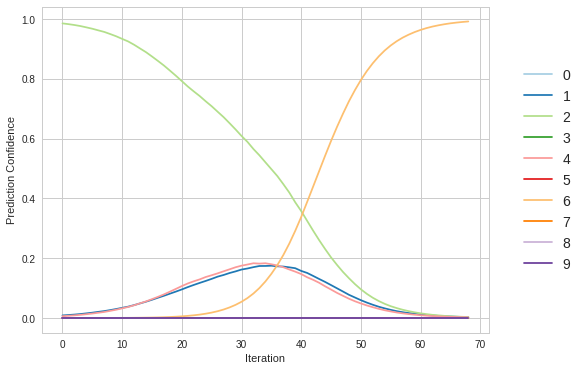

In [25]:
sns.set_style('whitegrid')
prob_history = np.array(prob_history)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i, record in enumerate(prob_history.T):
    plt.plot(record, color=colors_list[i])
    
ax.legend([str(x) for x in range(0, 10)], 
            loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=14)
ax.set_xlabel('Iteration')
ax.set_ylabel('Prediction Confidence')

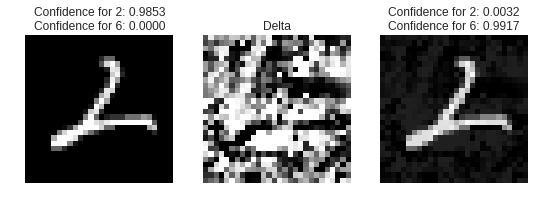

Difference Measure: 2.06413


In [26]:
sns.set_style('white')
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(1,3,1)
ax1.axis('off')
ax1.imshow(start_img.reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax1.title.set_text('Confidence for 2: ' + '{:.4f}'.format(prob_history[0][2]) 
                   + '\nConfidence for 6: ' + '{:.4f}'.format(prob_history[0][6]))

ax2 = fig.add_subplot(1,3,2)
ax2.axis('off')
ax2.imshow((adversarial_img - start_img).reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax2.title.set_text('Delta')

ax3 = fig.add_subplot(1,3,3)
ax3.axis('off')
ax3.imshow((adversarial_img).reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax3.title.set_text('Confidence for 2: ' + '{:.4f}'.format(prob_history[-1][2]) 
                   + '\nConfidence for 6: ' + '{:.4f}'.format(prob_history[-1][6]))

plt.show()

print("Difference Measure:", np.sum((adversarial_img - start_img) ** 2))

In [27]:
eta = 0.01

prediction=tf.argmax(y_pred,1)
probabilities=y_pred

adversarial_img = origin_images[1: 2].copy()
adversarial_label = target_labels[1: 2]
start_img = adversarial_img.copy()
confidence = 0
iter_num = 0
prob_history = list()
while confidence < threshold:
    gradient = img_gradient.eval({x: adversarial_img, y_: adversarial_label, keep_prob: 1.0})
    adversarial_img -= eta * gradient
    probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    confidence = probabilities_val[:, 6]
    prob_history.append(probabilities_val[0])
    iter_num += 1
print(iter_num)

109


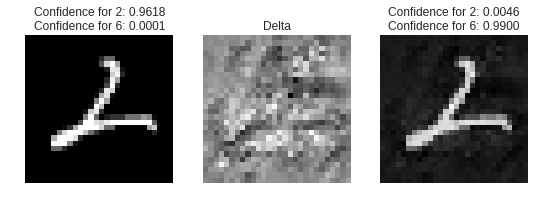

Difference Measure: 1.59228


In [28]:
sns.set_style('white')
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(1,3,1)
ax1.axis('off')
ax1.imshow(start_img.reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax1.title.set_text('Confidence for 2: ' + '{:.4f}'.format(prob_history[0][2]) 
                   + '\nConfidence for 6: ' + '{:.4f}'.format(prob_history[0][6]))

ax2 = fig.add_subplot(1,3,2)
ax2.axis('off')
ax2.imshow((adversarial_img - start_img).reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax2.title.set_text('Delta')

ax3 = fig.add_subplot(1,3,3)
ax3.axis('off')
ax3.imshow((adversarial_img).reshape([28, 28]), interpolation=None, cmap=plt.cm.gray)
ax3.title.set_text('Confidence for 2: ' + '{:.4f}'.format(prob_history[-1][2]) 
                   + '\nConfidence for 6: ' + '{:.4f}'.format(prob_history[-1][6]))

plt.show()

print("Difference Measure:", np.sum((adversarial_img - start_img) ** 2))

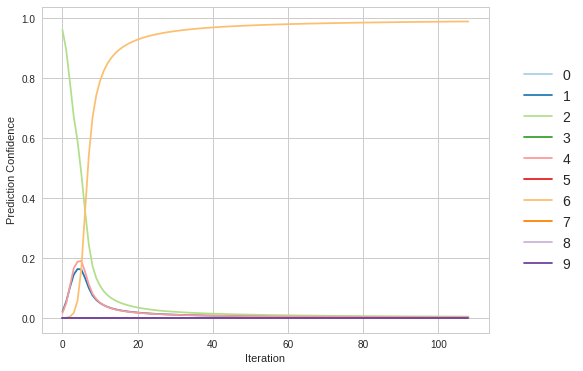

In [29]:
sns.set_style('whitegrid')
prob_history = np.array(prob_history)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i, record in enumerate(prob_history.T):
    plt.plot(record, color=colors_list[i])
    
ax.legend([str(x) for x in range(0, 10)], 
            loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=14)
ax.set_xlabel('Iteration')
ax.set_ylabel('Prediction Confidence')

We can observe that when taking the value of gradients into account, when it comes close to local optima, the gradient is becoming small and helps us to converge